Predict the number of rentals based on seasonality and weather conditions

In [1]:
import pandas as pd
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv

In [2]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [5]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


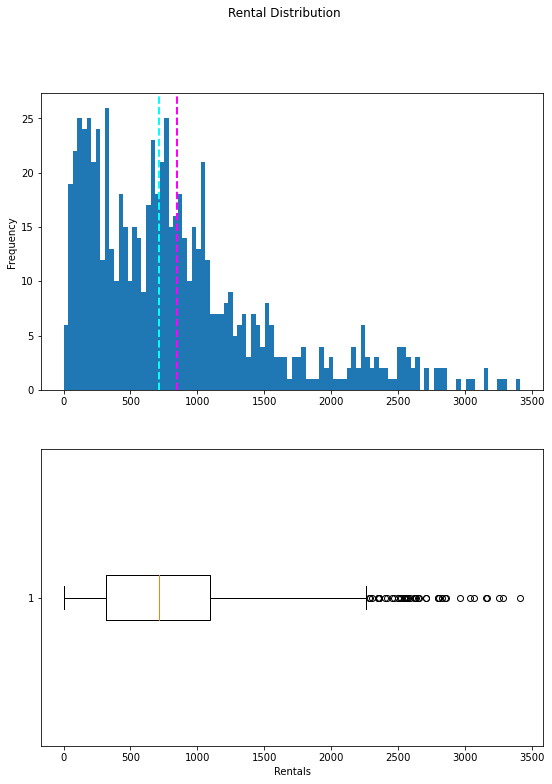

In [6]:
import matplotlib.pyplot as plt

label = bike_data['rentals']
fig, ax = plt.subplots(2, 1, figsize=(9,12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')
fig.suptitle('Rental Distribution')
plt.show()

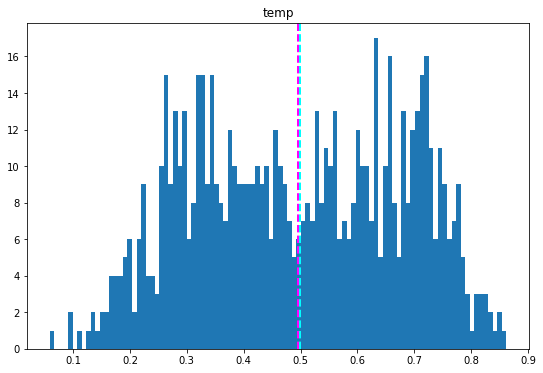

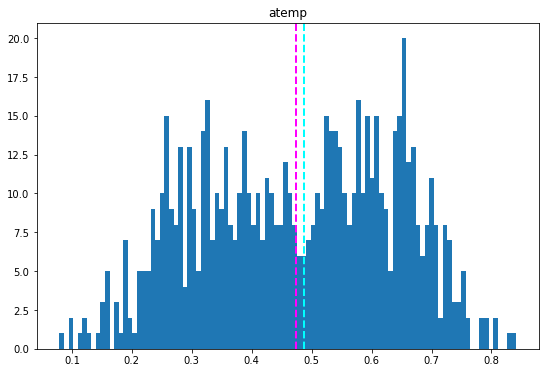

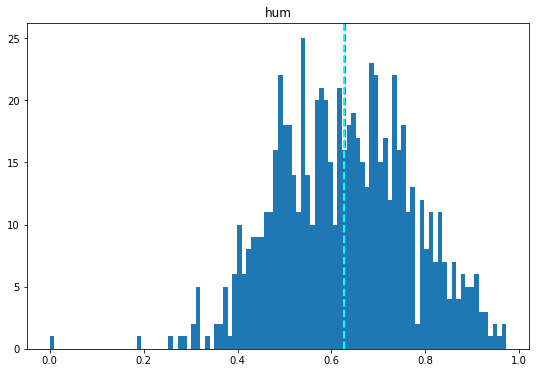

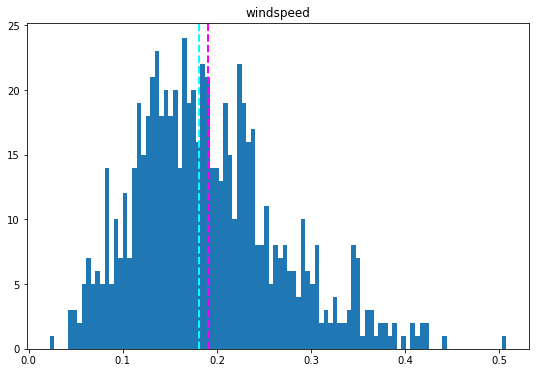

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike_data[col]
    ax.hist(feature, bins=100)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

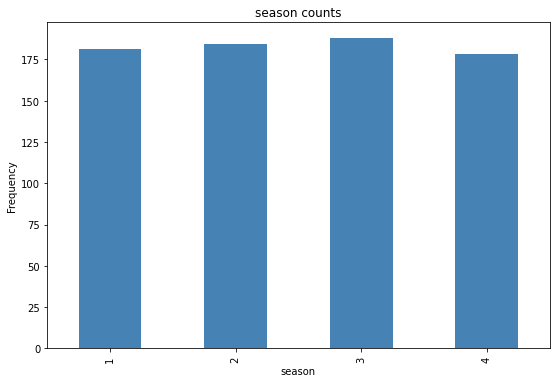

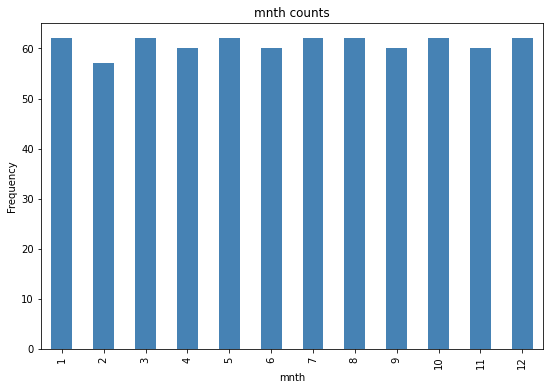

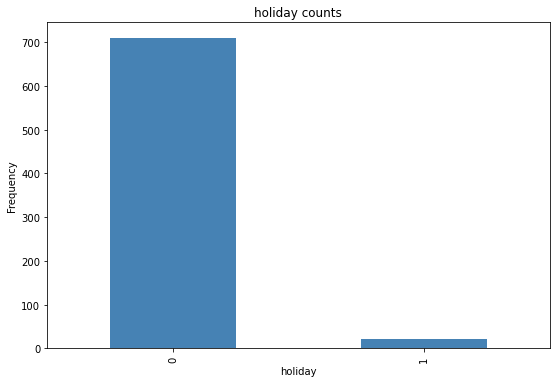

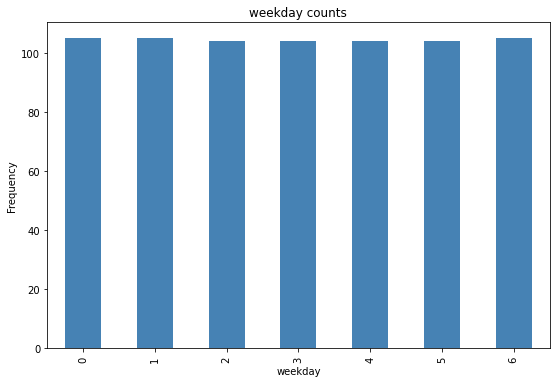

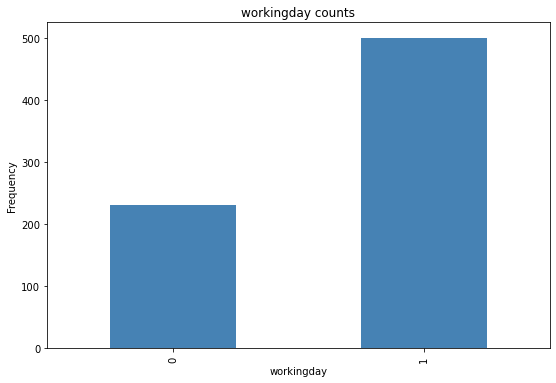

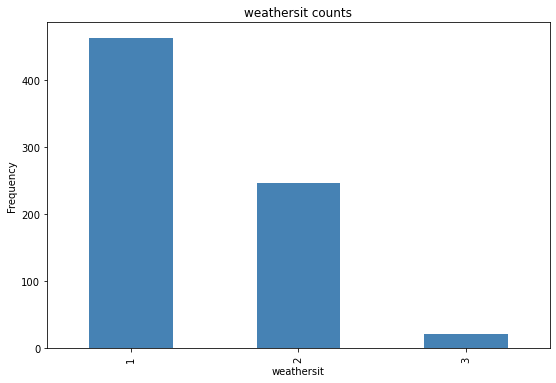

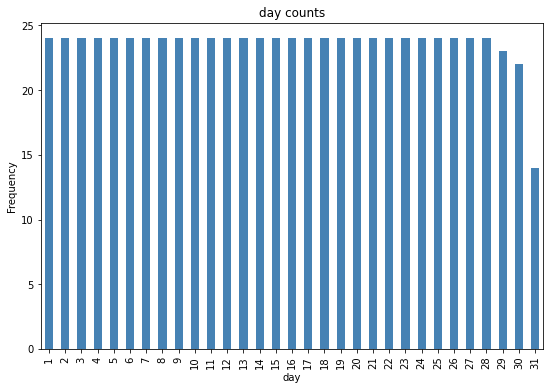

In [8]:
categorical_features = ['season','mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day']
for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    # print(counts)
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

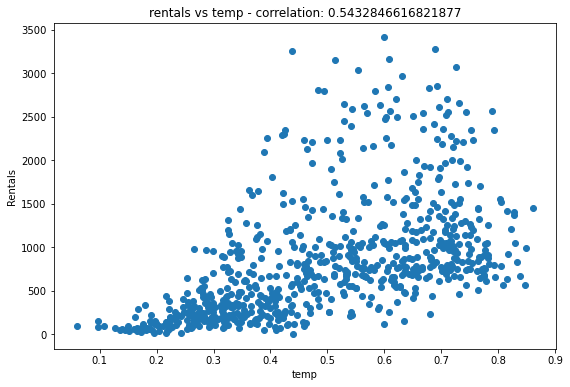

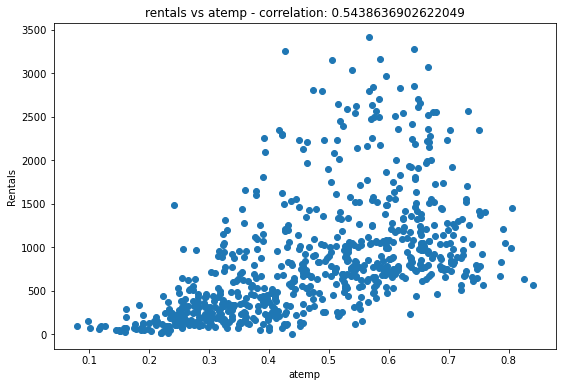

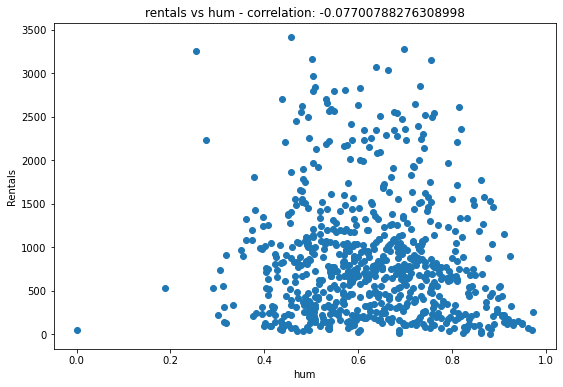

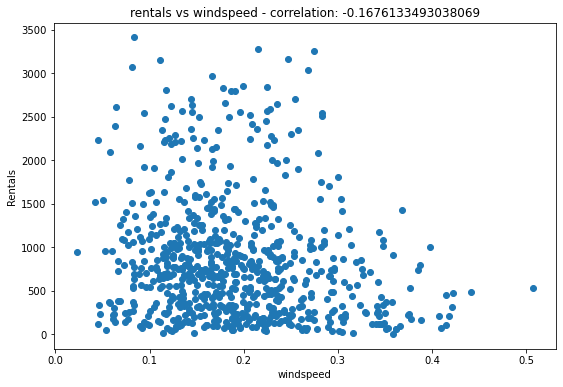

In [9]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(feature, label)
    ax.set_xlabel(col)
    ax.set_ylabel('Rentals')
    ax.set_title(f'rentals vs {col} - correlation: {str(correlation)}')
plt.show()

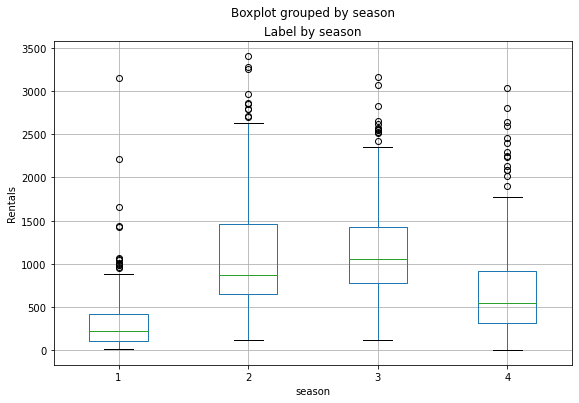

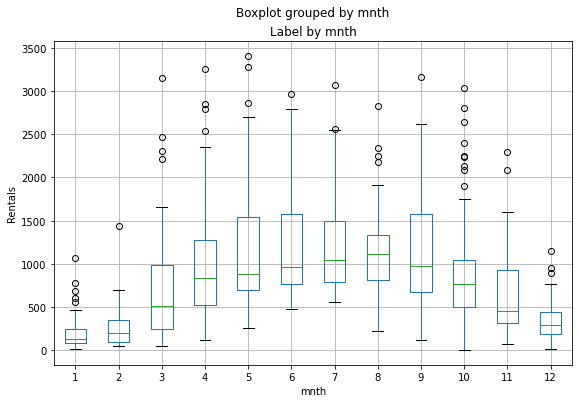

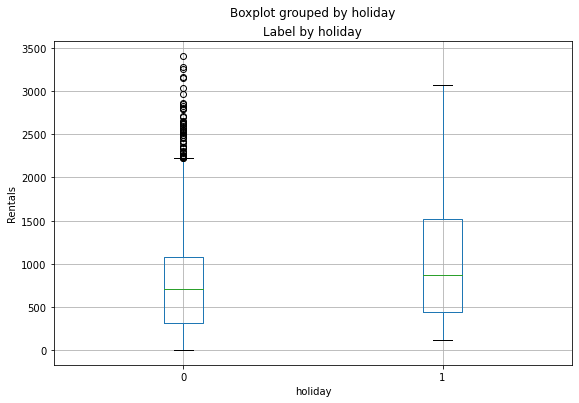

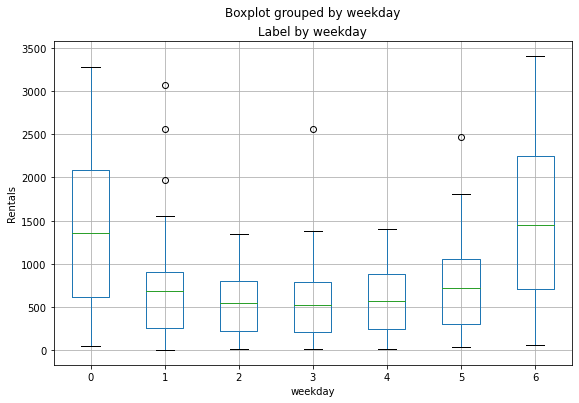

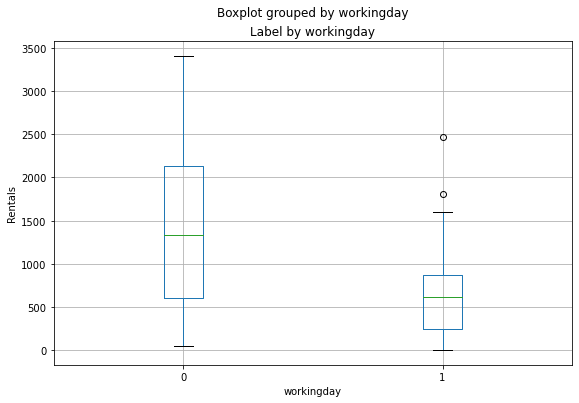

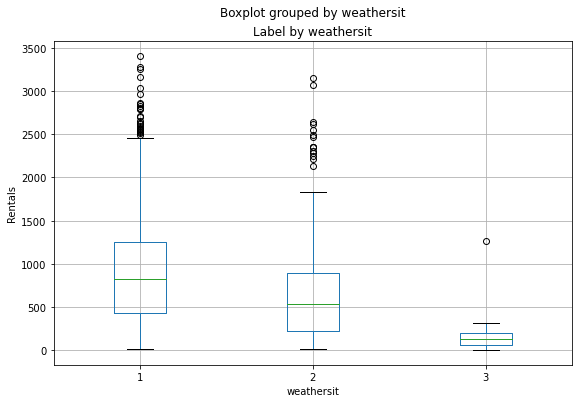

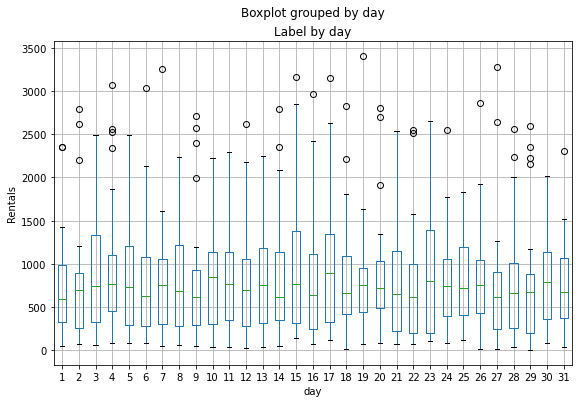

In [10]:
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    bike_data.boxplot(column='rentals', by=col, ax=ax)
    ax.set_title(f'Label by {col}')
    ax.set_ylabel('Rentals')
plt.show()

In [11]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print(X.shape, y.shape)

(731, 10) (731,)


In [12]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=0)

In [13]:
from sklearn import linear_model

In [14]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
pred = model.predict(X_test)

In [16]:
import numpy as np
print('Predicted labels: ', np.round(pred)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


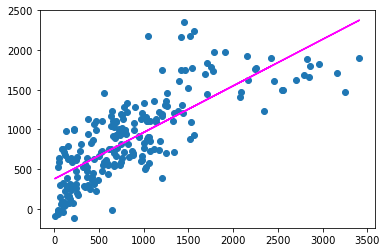

In [17]:
plt.scatter(y_test, pred)
z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

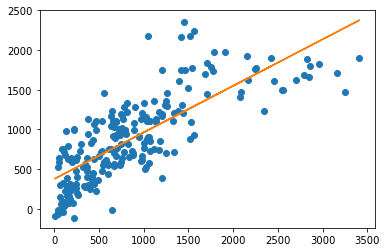

In [18]:
plt.scatter(y_test, pred)
model_z = linear_model.LinearRegression()
model_z.fit(y_test[:, np.newaxis], pred)
plt.plot(y_test, model_z.predict(y_test[:, np.newaxis]), color='C1')
plt.show()

In [19]:
from sklearn import metrics

In [20]:
mse = metrics.mean_squared_error(y_test, pred)
mse

201972.55947035598

In [21]:
rmse = np.sqrt(mse)
rmse

449.41357285951653

In [22]:
r2 = metrics.r2_score(y_test, pred)
r2

0.604045473691919